In [454]:
import graphviz
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,StratifiedKFold,train_test_split,cross_validate,GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier,plot_tree


plt.rcParams.update(plt.rcParamsDefault)

In [455]:
df= pd.read_csv('/content/heart.csv')
print("Sample of the first 10 rows of the table\n\n")
df.head(10)


Sample of the first 10 rows of the table




,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [456]:
print(f"Number of records in the dataset ready to be processed: {df.shape[0]}")
print(f"Number of details per record in the dataset ready to describe: {df.shape[1]}")

Number of records in the dataset ready to be processed: 918
Number of details per record in the dataset ready to describe: 12


In [457]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 331.6 KB




1. As the presented dataframe contains columns that are non-null values, we can skip the step where we need to take care of the missing values
2. Further, we will change a bit the datatypes of the dataframe, splitting them into 2 (categorical variables and numerical)

In [458]:
df = df.astype({'HeartDisease': 'category',
           'FastingBS': 'category'})
df['HeartDisease'] = df['HeartDisease'].cat.rename_categories({1: 'Yes', 0: 'No'})

In [459]:
number_dataTypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numericals = df.select_dtypes(include=number_dataTypes).columns
print("Columns that hold numerical data are: ")
for item in numericals:
  print(item)

Columns that hold numerical data are: 
Age
RestingBP
Cholesterol
MaxHR
Oldpeak


In [460]:
category_dataTypes = ['object', 'category']
categoricals = df.select_dtypes(include=category_dataTypes).columns
print("Columns that hold categorical data are: ")
for item in categoricals:
  print(item)

Columns that hold categorical data are: 
Sex
ChestPainType
FastingBS
RestingECG
ExerciseAngina
ST_Slope
HeartDisease


In [461]:
print("Describing statistical variables for the numeric columns:")
df.describe().T.style.background_gradient(cmap = "Reds")

Describing statistical variables for the numeric columns:


,count,mean,std,min,25%,50%,75%,max
Age,918.000000,53.510893,9.432617,28.000000,47.000000,54.000000,60.000000,77.000000
RestingBP,918.000000,132.396514,18.514154,0.000000,120.000000,130.000000,140.000000,200.000000
Cholesterol,918.000000,198.799564,109.384145,0.000000,173.250000,223.000000,267.000000,603.000000
MaxHR,918.000000,136.809368,25.460334,60.000000,120.000000,138.000000,156.000000,202.000000
Oldpeak,918.000000,0.887364,1.066570,-2.600000,0.000000,0.600000,1.500000,6.200000


In [462]:
print("Describing statistical variables for the categorical columns:")
df.describe(include = category_dataTypes).T

Describing statistical variables for the categorical columns:


,count,unique,top,freq
Sex,918,2,M,725
ChestPainType,918,4,ASY,496
FastingBS,918,2,0,704
RestingECG,918,3,Normal,552
ExerciseAngina,918,2,N,547
ST_Slope,918,3,Flat,460
HeartDisease,918,2,Yes,508


In [463]:
def pie_charts(feature, target):
    labels = df[feature].unique()

    title = f'Percent of people that suffered a {target} based on {feature}'
    fig = go.Figure(data=[go.Pie(labels=labels, values=df[df[target]=="Yes"][feature].value_counts())])
    fig.update_layout(title=title, showlegend=False,font=dict(
        family="Courier New, monospace",
        size=17,
        color="RebeccaPurple"
    ))

    fig.show()


In [464]:
binary_feature = ["ExerciseAngina", "FastingBS", "Sex"]
for feature in binary_feature:
    pie_charts(feature,"HeartDisease")

In [465]:
def bar_charts(data, feature, target) :
    fig =go.Figure(data=[
    go.Bar(x=df[feature].unique(), y=df[df[target]=="Yes"][feature].value_counts(), marker_color='red'),
])
    fig.update_layout(title=f'Impact on different {feature} groups on having a {target}', showlegend=False,font=dict(
        family="Courier New, monospace",
        size=17,
        color="RebeccaPurple"
    ))

    fig.show()

In [466]:
bar_charts(df, "ST_Slope", "HeartDisease")

In [467]:
bar_charts(df, "ChestPainType", "HeartDisease")

In [468]:
bar_charts(df, "RestingECG", "HeartDisease")

In [469]:
def density_charts(column, target) : 
    fig, ax = plt.subplots(figsize = (13,5))
    sns.kdeplot(df[df[target]=='Yes'][column],shade = False, color="red", label=target, ax = ax)
    plt.title('KDE-Plot of {}'.format(column), fontsize = 18)
    ax.set_xlabel(column)
    ax.set_ylabel("Frequency")
    ax.legend();
    plt.show()

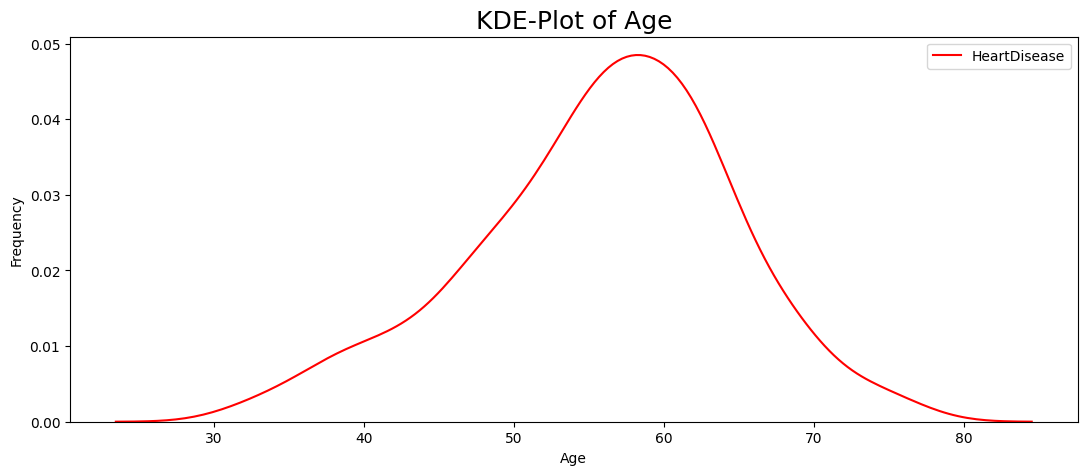

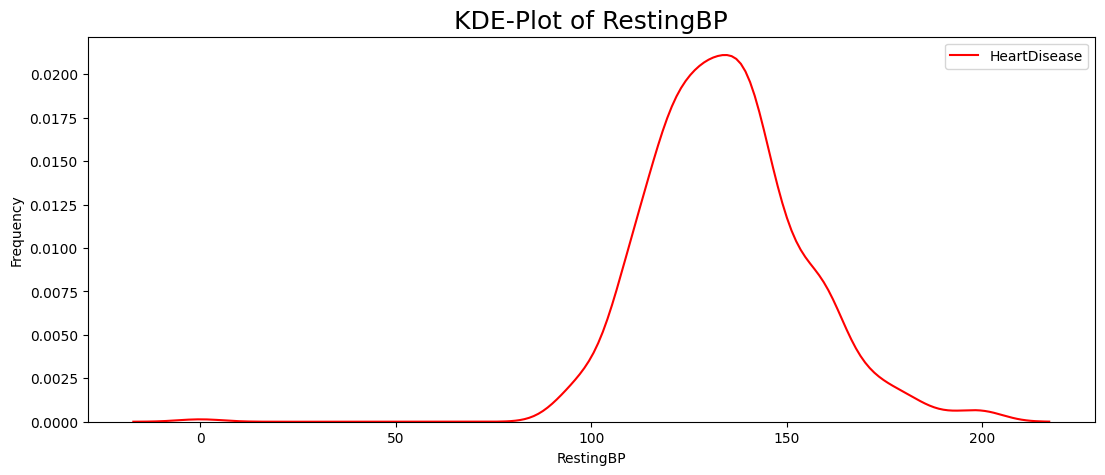

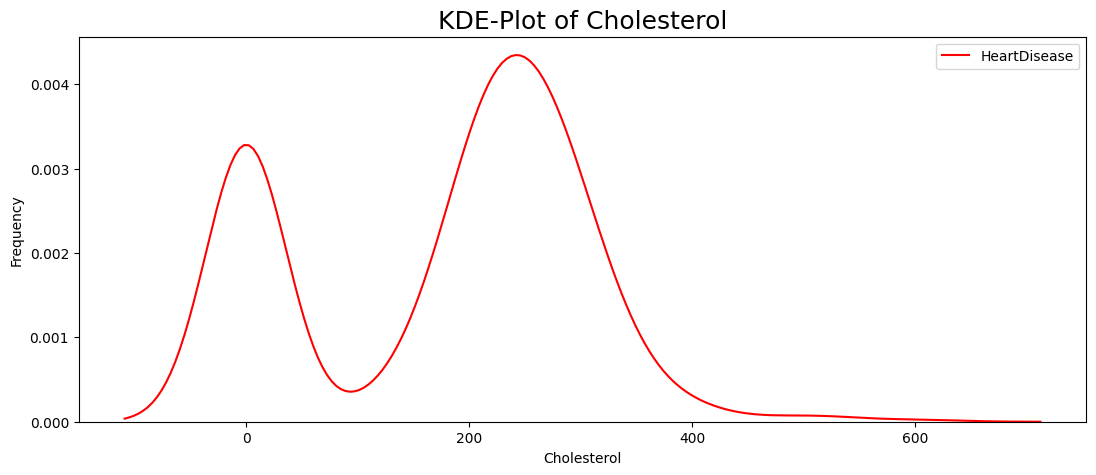

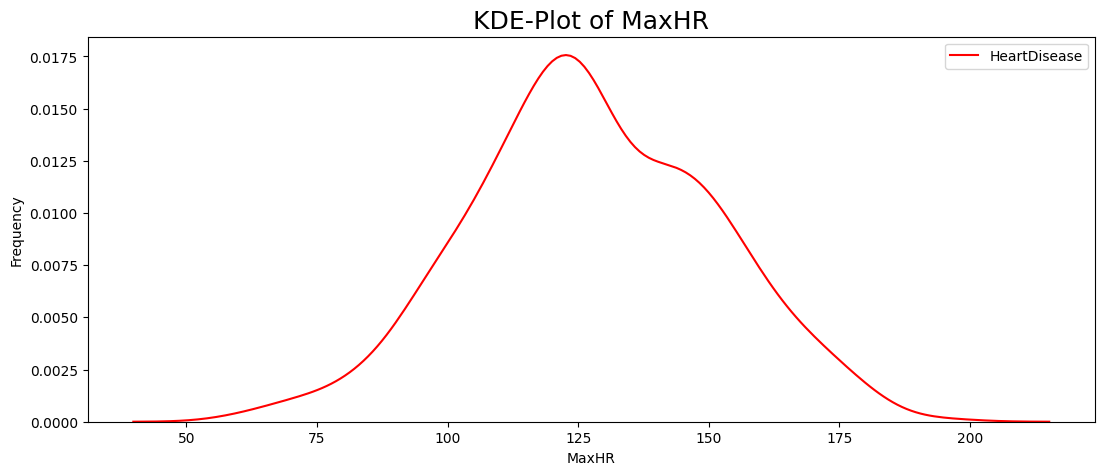

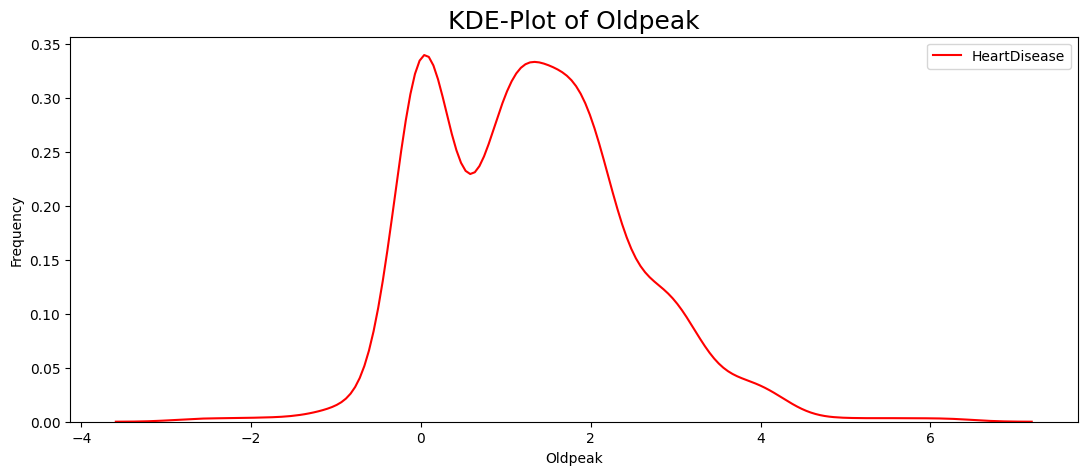

In [470]:
for column in numericals : 
    density_charts(column, 'HeartDisease')

In [471]:
def histograms(column, title):

    fig = plt.figure(figsize=(17, 7))
    grid = GridSpec(nrows=2, ncols=1, figure=fig)

    ax0 = fig.add_subplot(grid[0, :])
    ax0.set_title(f'Histogram and BoxPlot of {title}')
    sns.histplot(column, ax=ax0, color="red",multiple="stack")

    ax1 = fig.add_subplot(grid[1, :])
    plt.axis('off')
    sns.boxplot(x=column, ax=ax1, color="red")

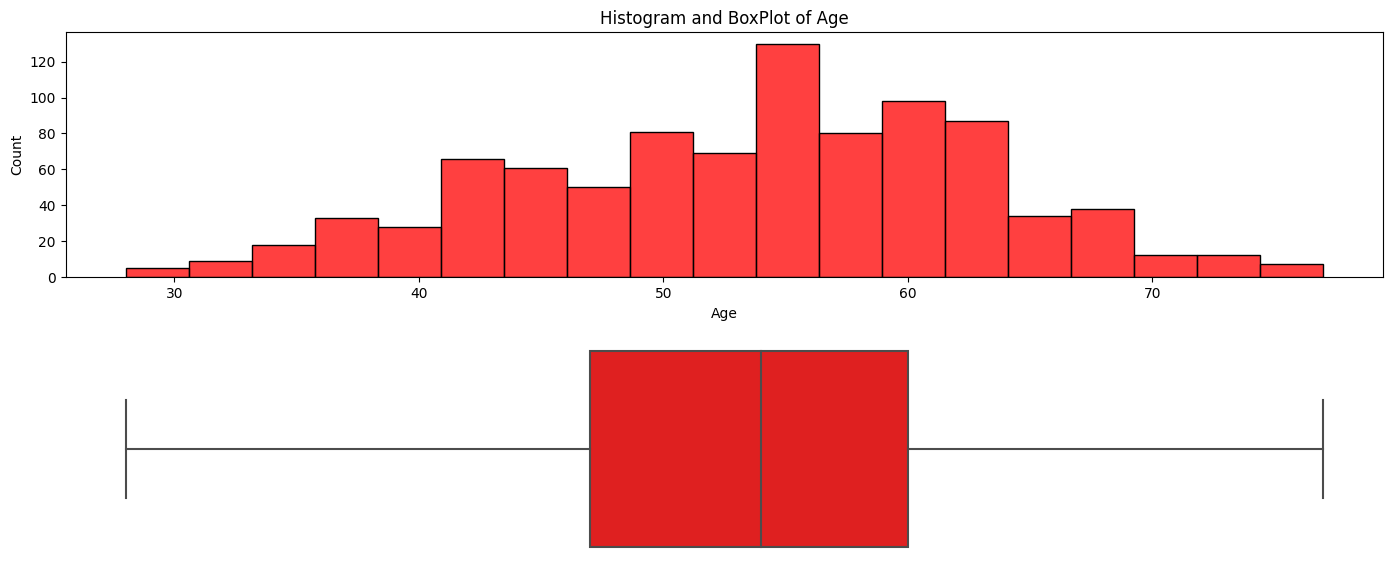

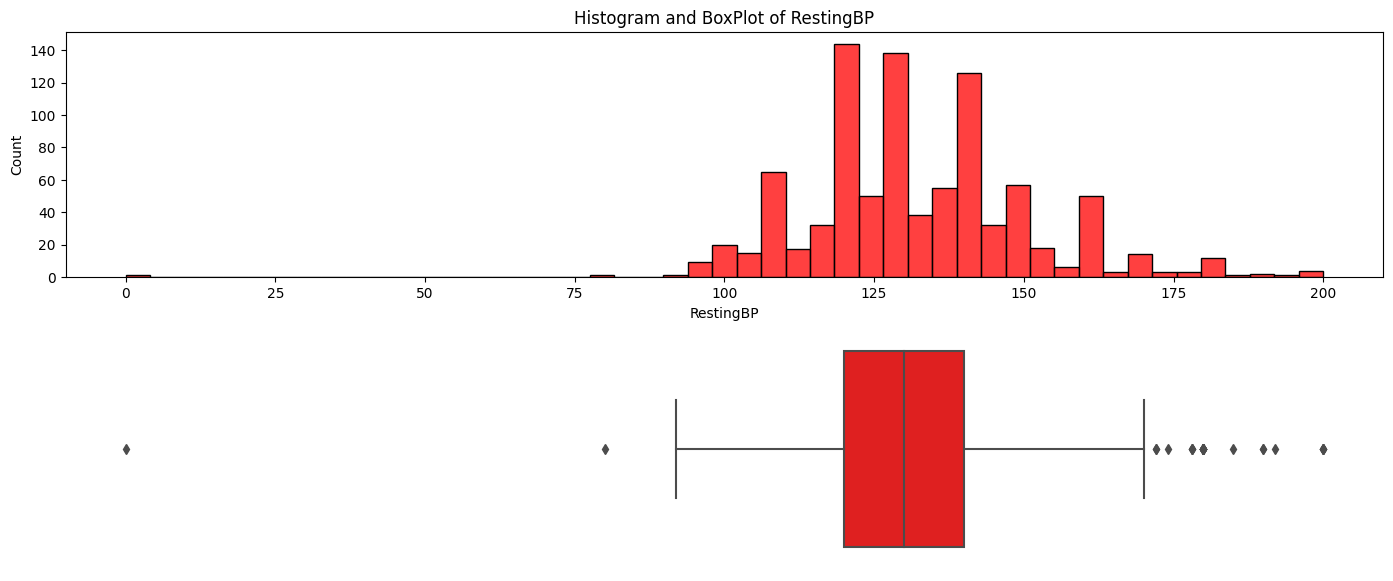

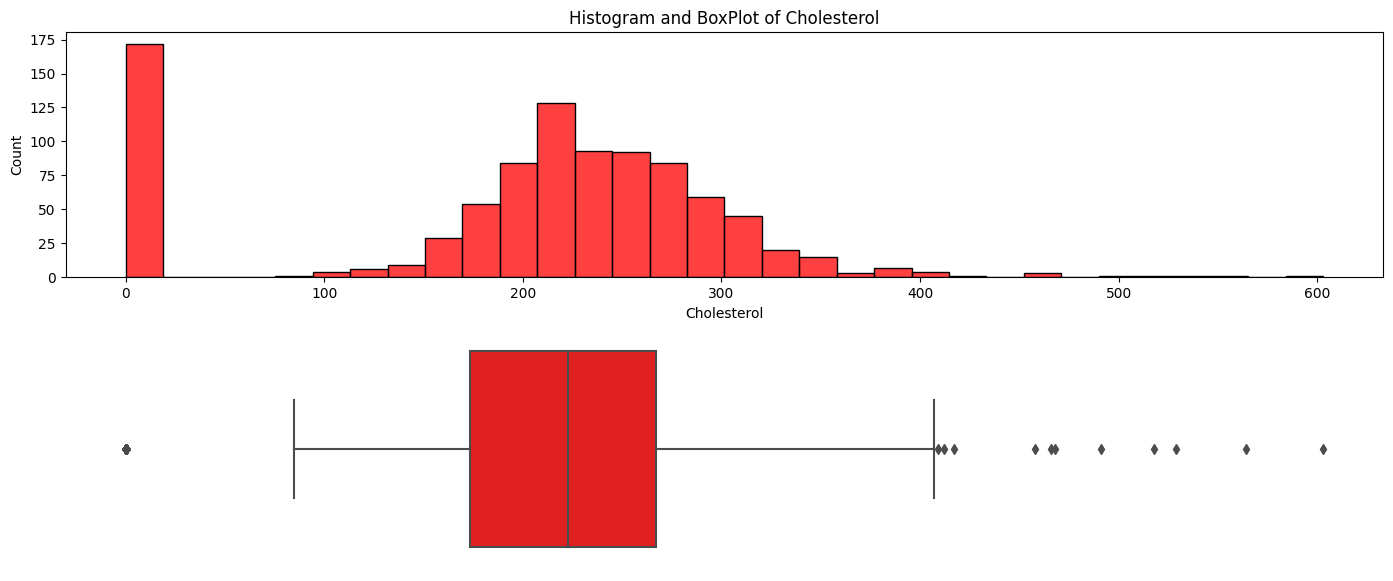

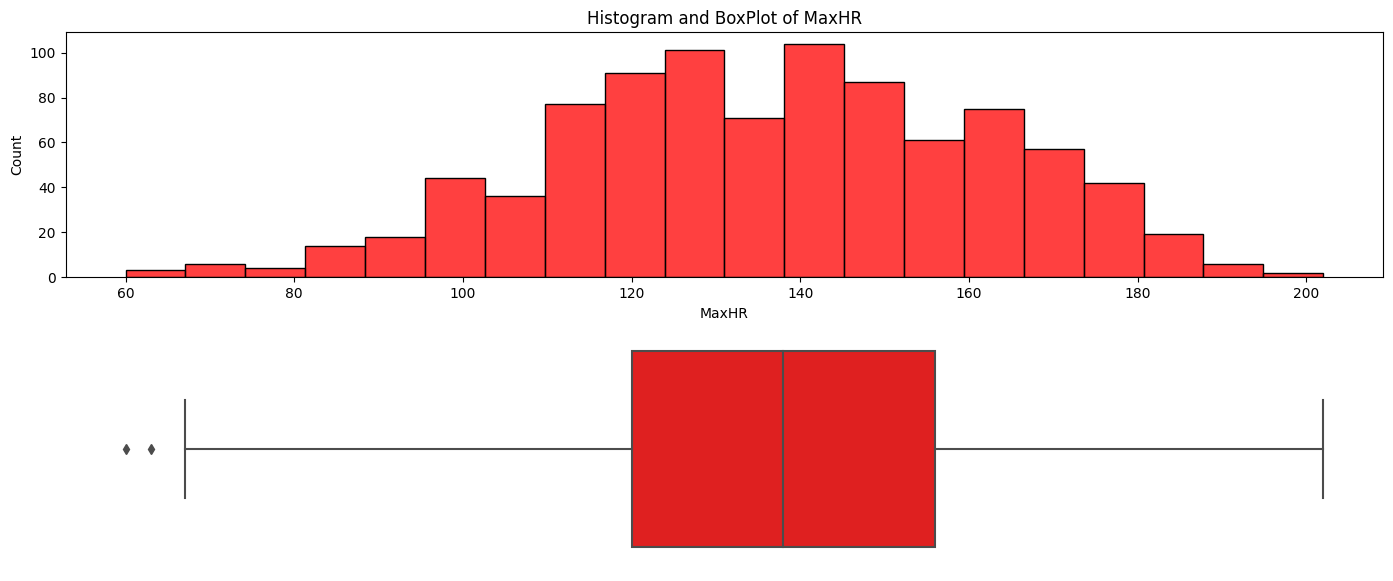

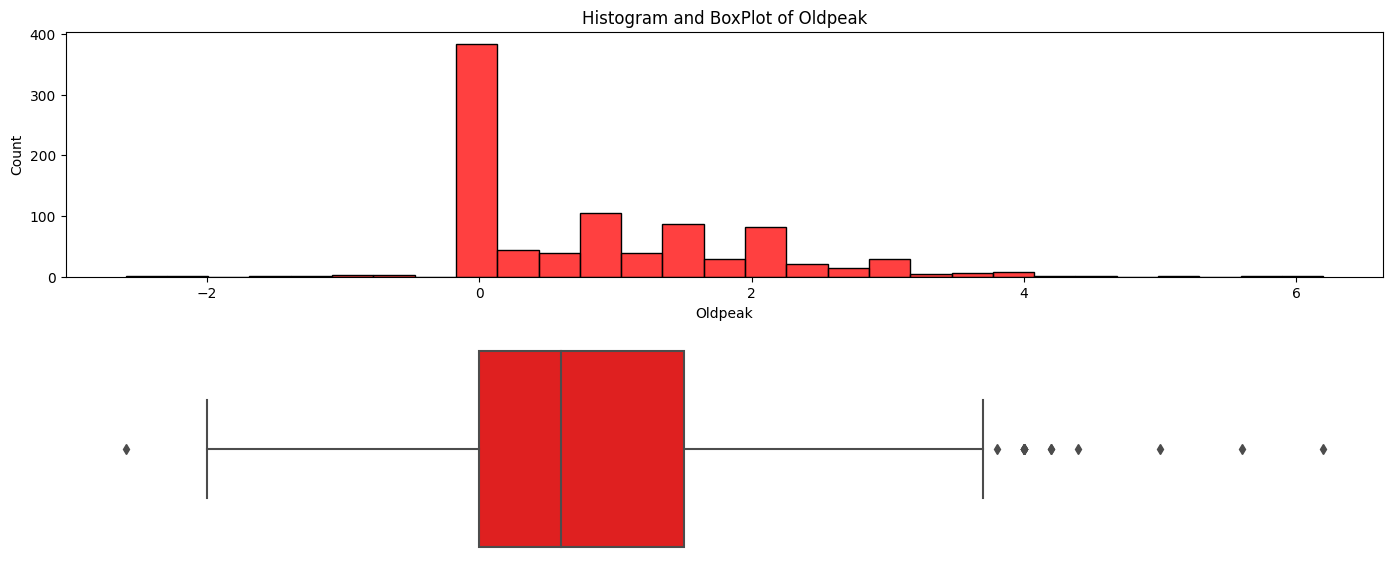

In [472]:
for col in numericals:
    histograms(df[col], col)

In [473]:
def show_grouped_data(features,target):
  plt.figure(figsize=(20,20))
  index=1
  for feature in features:
      plt.subplot(3,4,index)
      sns.countplot(x=df[feature],hue=df[target])
      plt.title(f'{feature}') 

      plt.subplot(3,4,index+1)
      feature_counts = df[feature].value_counts()
      plt.pie(feature_counts,explode=[0.1 for _ in range(feature_counts.shape[0])],autopct='%0.2f%%',shadow=True,labels=feature_counts.index)
      plt.title(f'{feature}')

      index +=2

  plt.show()

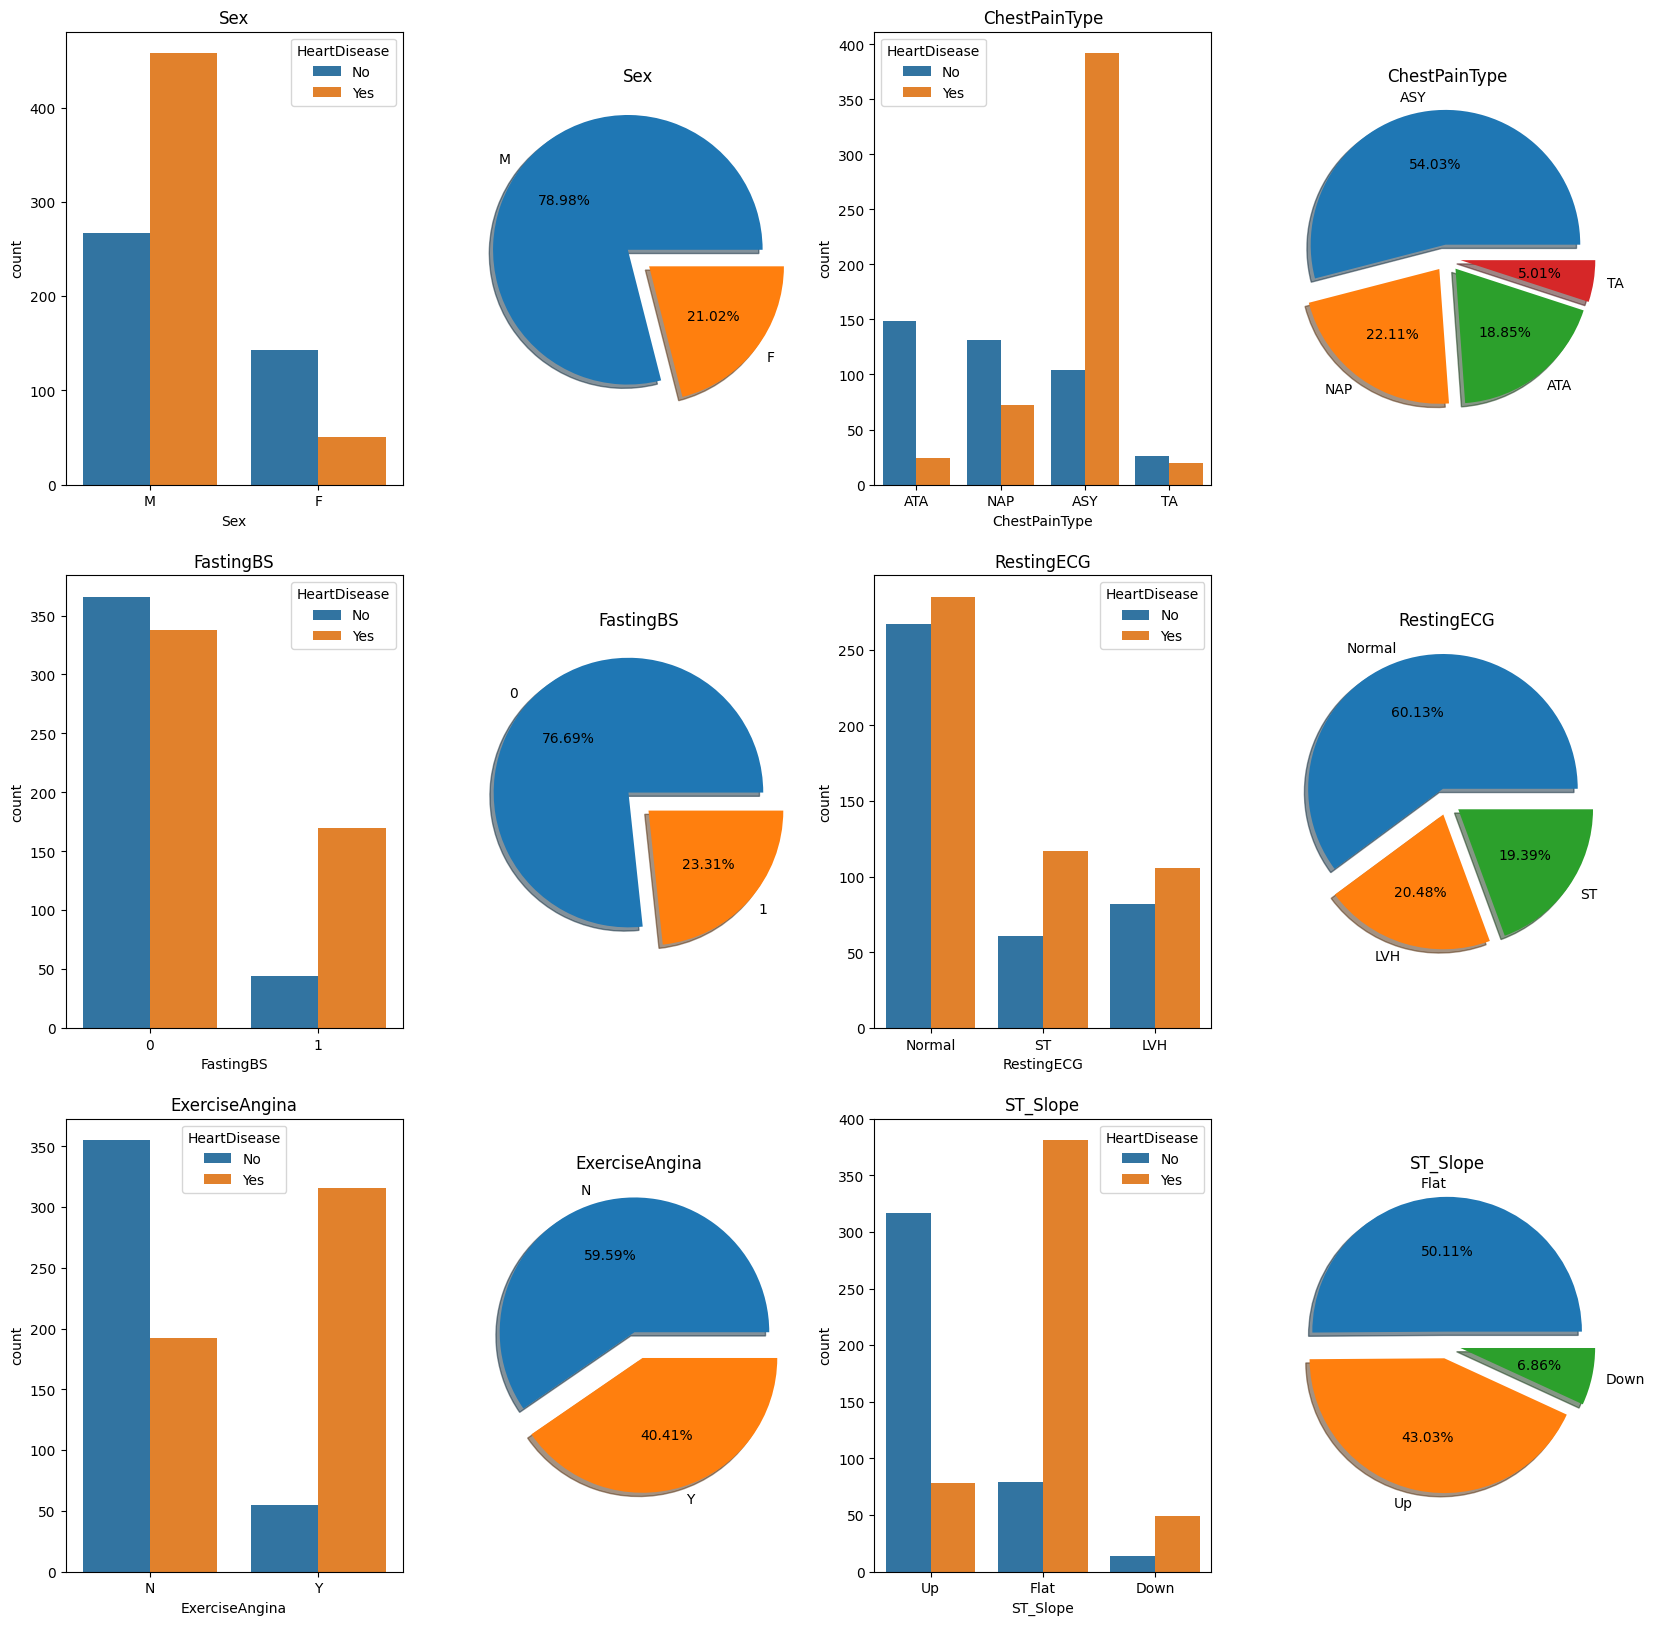

In [474]:

show_grouped_data(categoricals.drop('HeartDisease'),'HeartDisease')

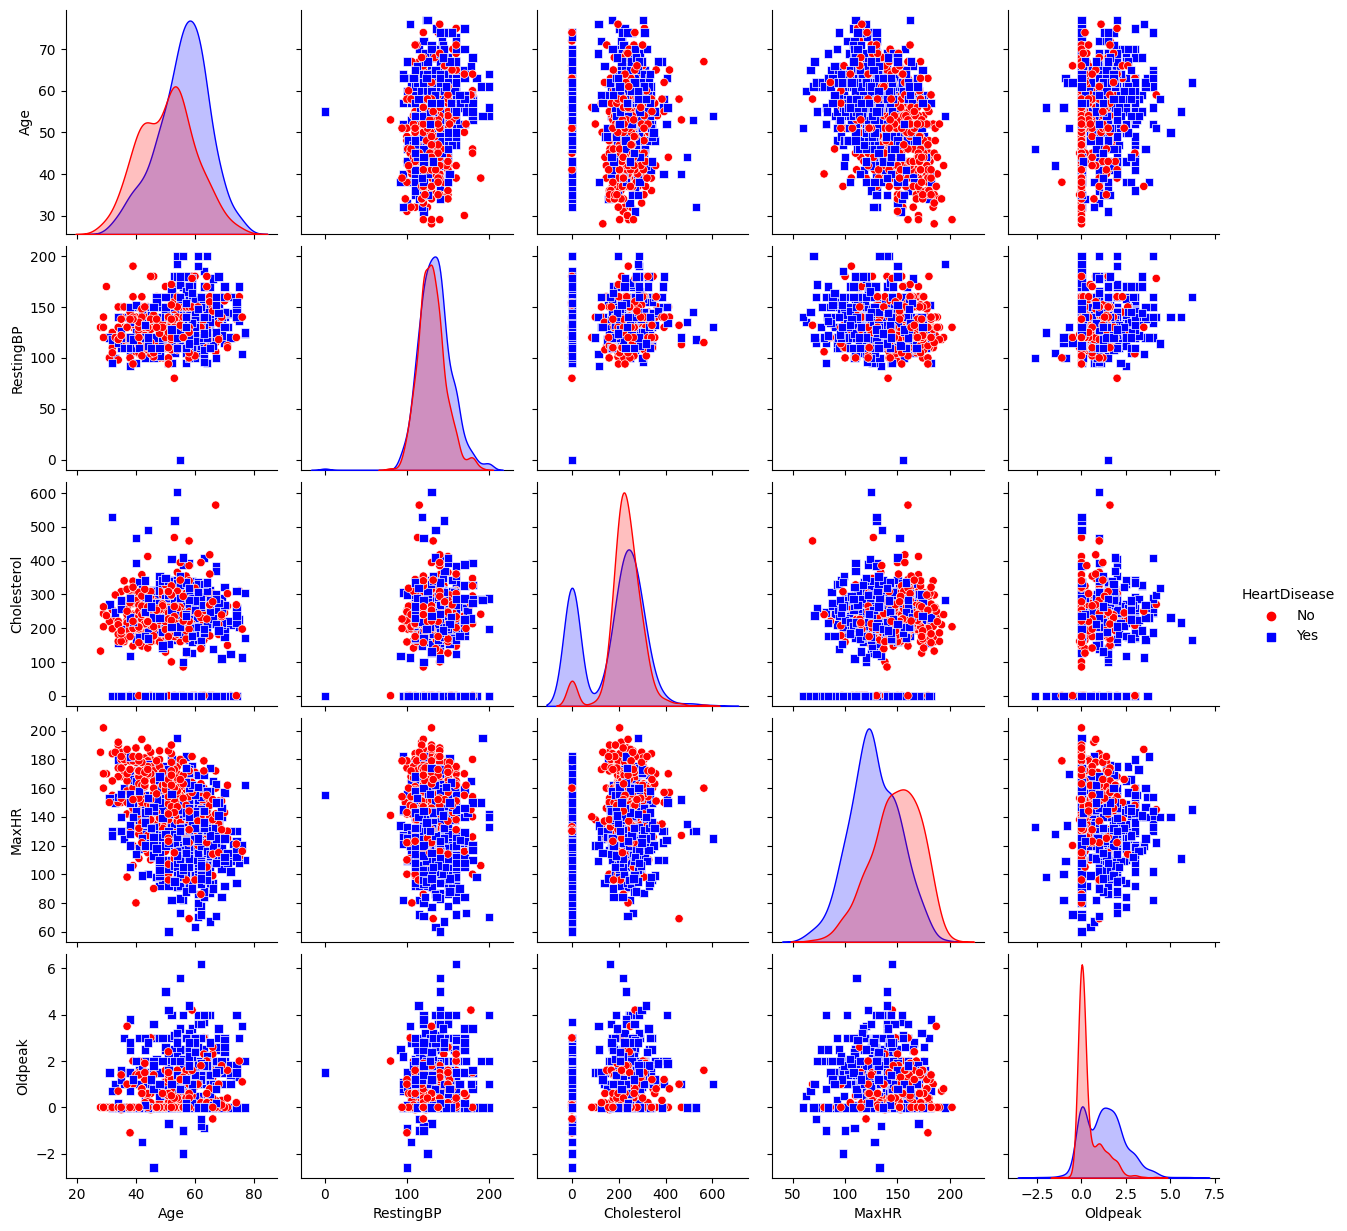

In [475]:
plot = sns.pairplot(df,hue='HeartDisease', markers=["o", "s"], palette=['red','blue'])
plt.show()

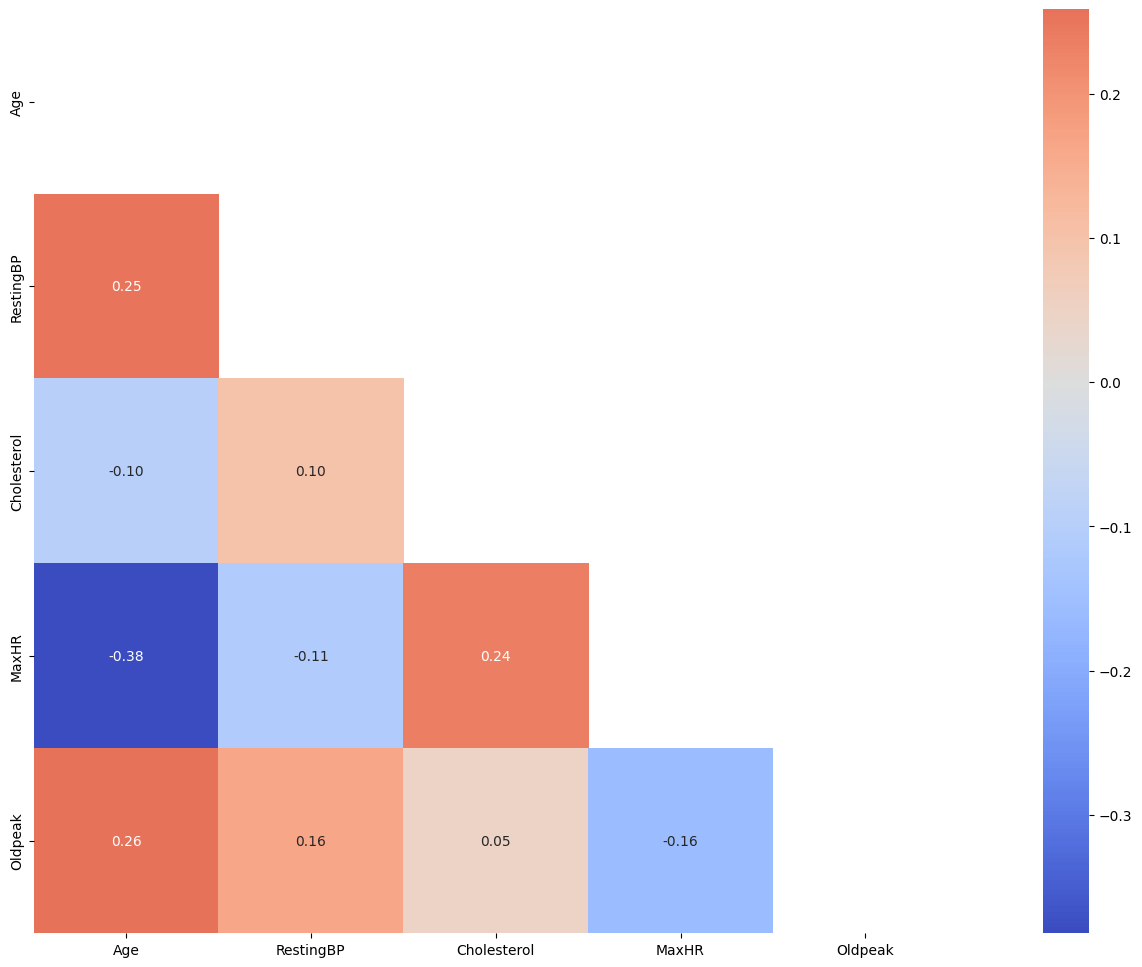

In [476]:
matrix = df.corr()
mask = np.triu(np.ones_like(matrix,dtype='bool'))

plt.figure(figsize=(22,12))
sns.heatmap(matrix,mask=mask,annot=True,center=0,fmt='.2f',square=True,cmap="coolwarm")
plt.show()

In [477]:
df['HeartDisease'] = df['HeartDisease'].cat.rename_categories({'Yes': 1, 'No': 0})

In [478]:
#Tree algorithm
df_tree = df.apply(LabelEncoder().fit_transform)
X_tree,y_tree=df_tree.drop('HeartDisease',axis=1),df_tree['HeartDisease']
xtree_train, xtree_test, ytree_train, ytree_test = train_test_split(X_tree, y_tree, test_size=0.3)

In [479]:
#Non tree algorithm
str_col = [col for col in df.columns if df[col].dtype=='object']
df_nontree = pd.get_dummies(df,columns=str_col,drop_first=False)
df_nontree.head()
X_nontree,y_nontree=df_nontree.drop('HeartDisease',axis=1),df_nontree['HeartDisease']
xnontree_train, xnontree_test, ynontree_train, ynontree_test = train_test_split(X_nontree, y_nontree, test_size=0.3)

In [480]:
#Logistic Regression
kf = StratifiedKFold(n_splits=5)
log = make_pipeline(StandardScaler(),LogisticRegression())
log_score = cross_validate(log,X=xnontree_train,y=ynontree_train,cv=kf,scoring=['accuracy','roc_auc','recall','precision'])

In [481]:
#SVM
kf = StratifiedKFold(n_splits=5)
svc = make_pipeline(StandardScaler(),SVC())
svc_para_grid = {'svc__kernel':['linear', 'poly', 'rbf']}
svc_grid = GridSearchCV(svc,param_grid=svc_para_grid,cv=kf,scoring='accuracy',return_train_score=True,refit=True)
svc_grid.fit(X=xnontree_train,y=ynontree_train)
svc_score=cross_validate(svc_grid,X=xtree_train,y=ytree_train,cv=kf,scoring=['accuracy','recall','precision','roc_auc'])


In [482]:
#KNN
kf = StratifiedKFold(n_splits=5)
kn = make_pipeline(StandardScaler(),KNeighborsClassifier())
kn_para_grid = {'kneighborsclassifier__n_neighbors':[4,8,16,32,64,128]}
kn_grid = GridSearchCV(kn,param_grid=kn_para_grid,cv=kf,scoring='accuracy',return_train_score=True,refit=True)
kn_grid.fit(X=xnontree_train,y=ynontree_train)
kn_score=cross_validate(kn_grid,X=xtree_train,y=ytree_train,cv=kf,scoring=['accuracy','recall','precision','roc_auc'])


In [483]:
#Decision Tree
kf = StratifiedKFold(n_splits=5)
dtree = DecisionTreeClassifier()
dtree_score=cross_validate(dtree,X=xtree_train,y=ytree_train,cv=kf,scoring=['accuracy','recall','precision','roc_auc'])

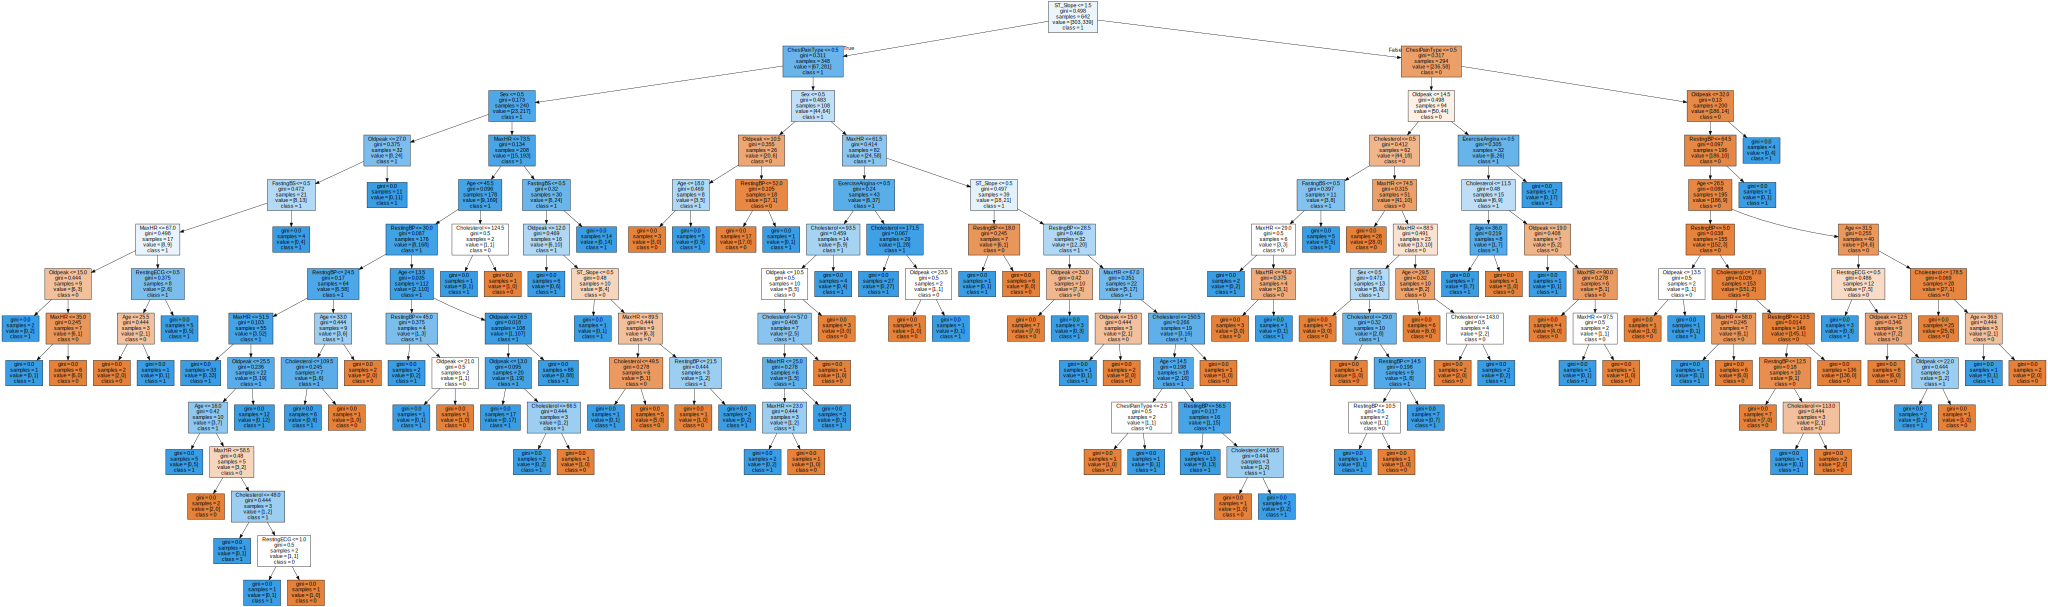

In [484]:
#plotting result
dtree = dtree.fit(xtree_train,ytree_train)
dot_data = export_graphviz(dtree,feature_names=xtree_train.columns,
                           class_names=['0','1'],filled=True,out_file=None)
graph = graphviz.Source(dot_data,format='png')
graph

In [485]:
#Random Forest
kf = StratifiedKFold(n_splits=5)
rfor = RandomForestClassifier(n_estimators=200)
rfor_score = cross_validate(rfor,X=xtree_train,y=ytree_train,cv=kf,scoring=['accuracy','recall','precision','roc_auc'])

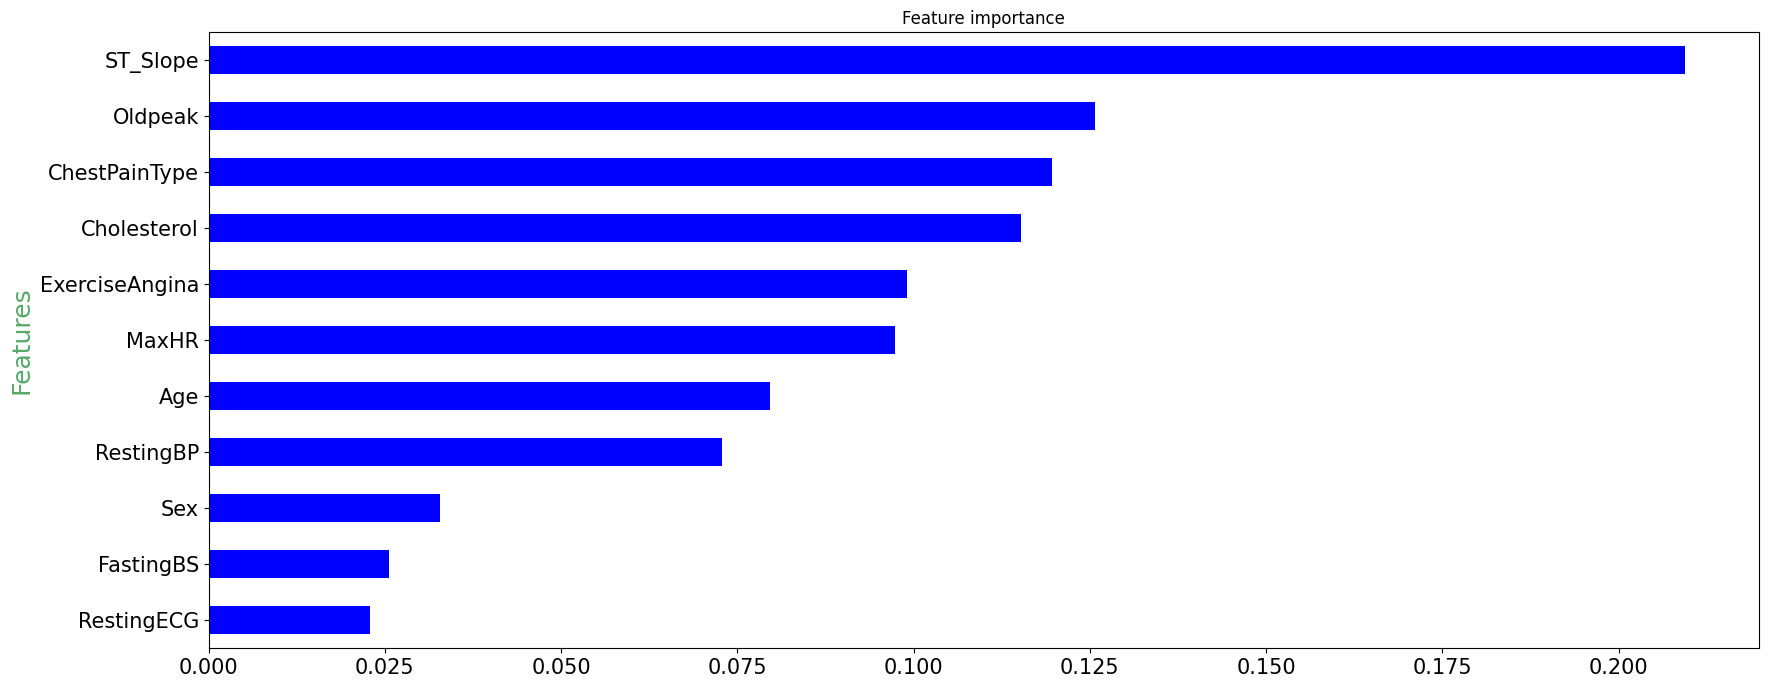

In [486]:
# Plotting result
rfor.fit(xtree_train,ytree_train)
importance = pd.Series(rfor.feature_importances_,index=xtree_train.columns).sort_values()
ax = importance.plot.barh(color = 'blue', fontsize = 15)
ax.set(title = 'Feature importance')
ax.set_ylabel('Features', color = 'g', fontsize = '18')
ax.figure.set_size_inches(20, 8)
plt.show()

In [487]:
#XGBoost
kf = StratifiedKFold(n_splits=5)
xgb = XGBClassifier()
xgb_score = cross_validate(xgb,X=xtree_train,y=ytree_train,cv=kf,scoring=['accuracy','recall','precision','roc_auc'])

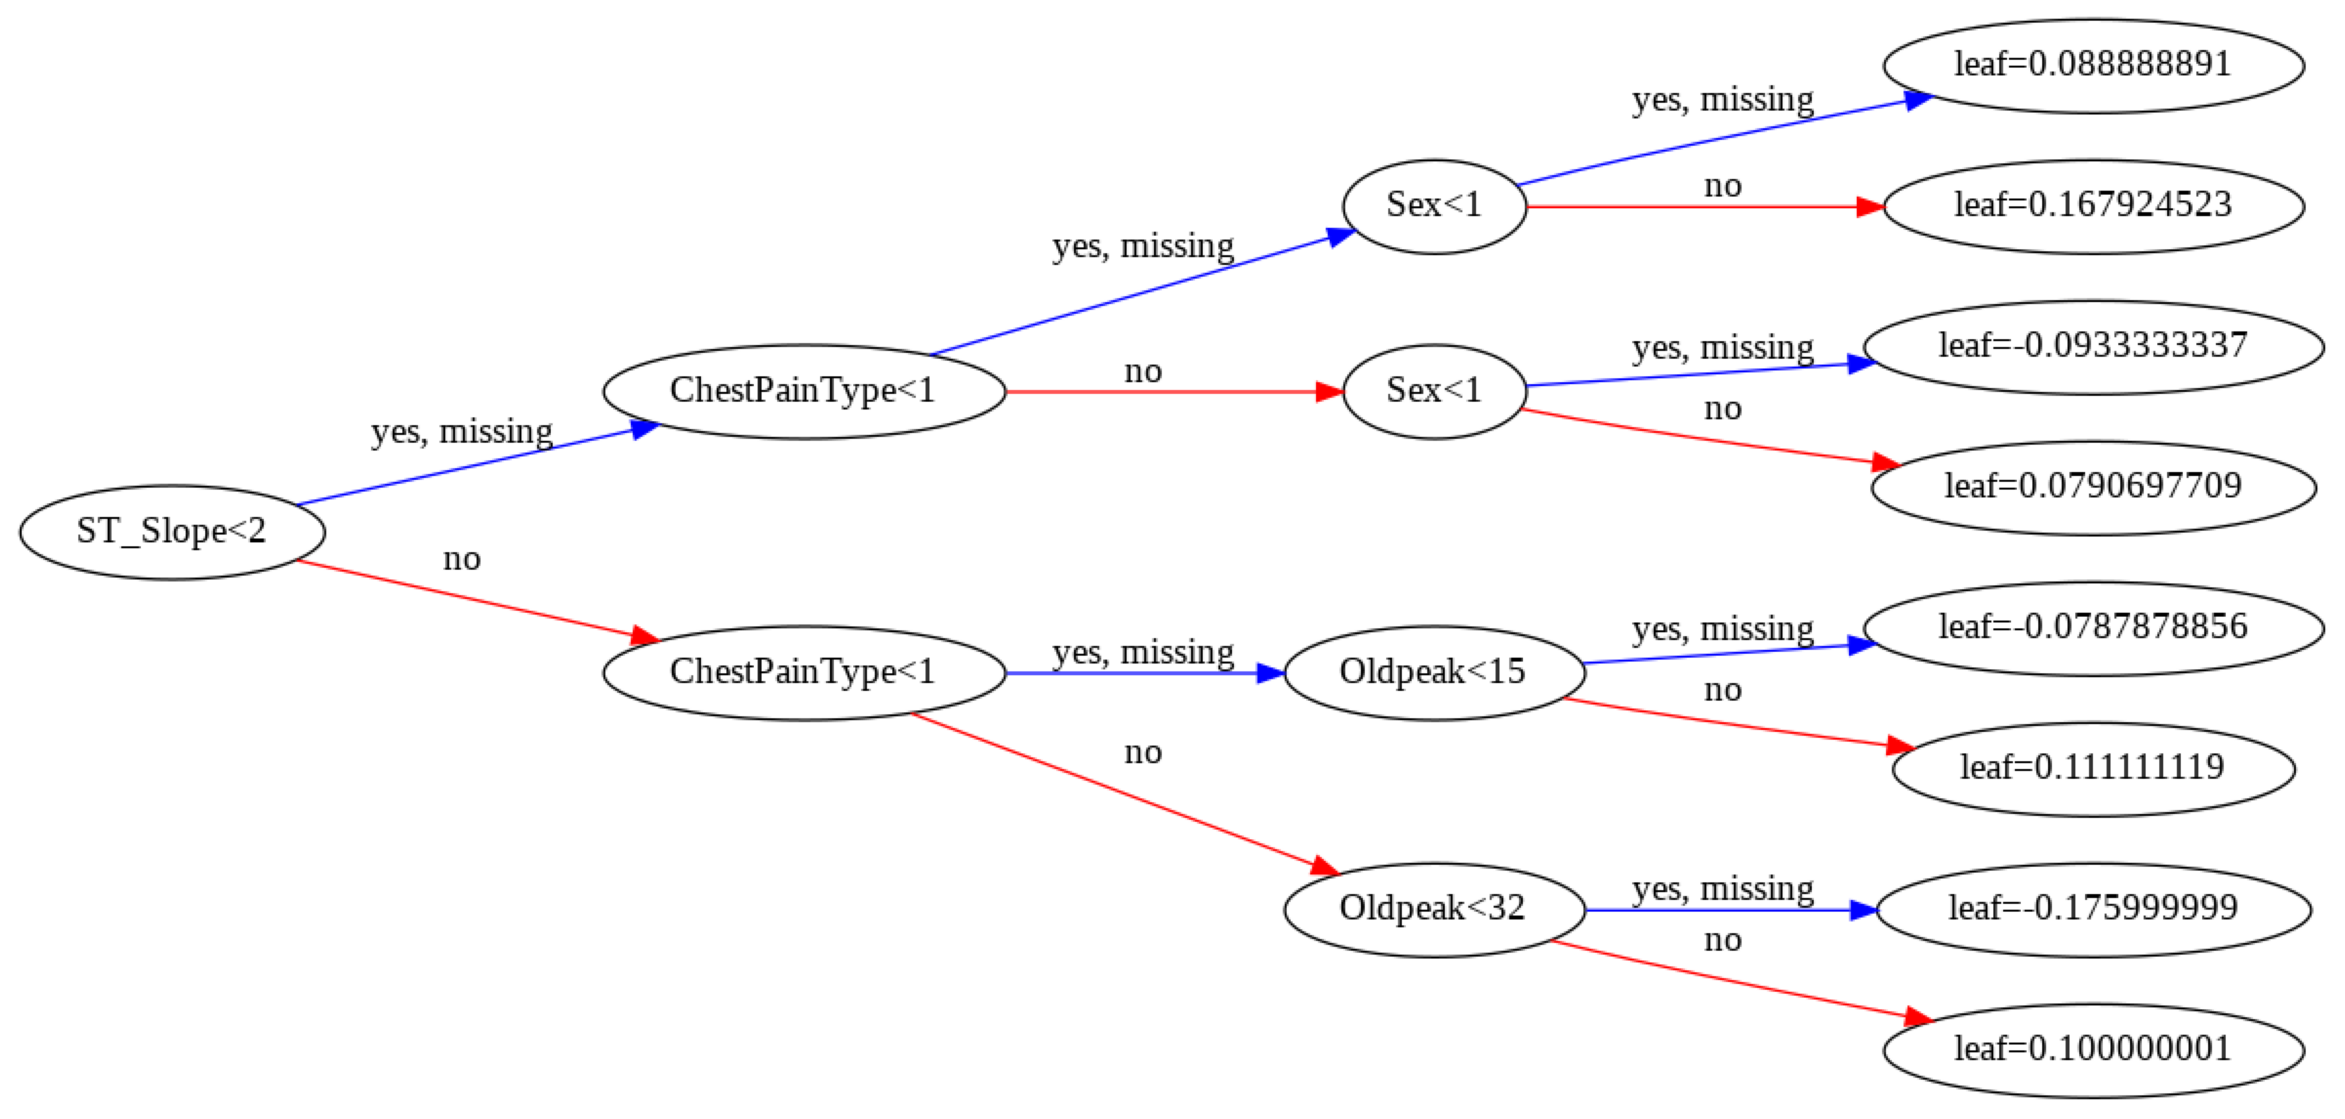

In [488]:
# Plotting result
fig, ax = plt.subplots(figsize=(30, 30))
xgb.fit(xtree_train,ytree_train)
plot_tree(xgb,num_trees=0,rankdir="LR",ax=ax)
plt.show()

In [489]:

df_model = pd.DataFrame(index=['Logistic Regression', 'Support Vector Machines','K-Nearest Neighbor','Decision Trees','Random Forest', 'XGBoost'], columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = [log_score['test_accuracy'].mean(),svc_score['test_accuracy'].mean(),kn_score['test_accuracy'].mean(),dtree_score['test_accuracy'].mean(),rfor_score['test_accuracy'].mean(),xgb_score['test_accuracy'].mean()]
df_model['Precision'] = [log_score['test_precision'].mean(),svc_score['test_precision'].mean(),kn_score['test_precision'].mean(),dtree_score['test_precision'].mean(),rfor_score['test_precision'].mean(),xgb_score['test_accuracy'].mean()]
df_model['Recall'] = [log_score['test_recall'].mean(),svc_score['test_recall'].mean(),kn_score['test_recall'].mean(),dtree_score['test_recall'].mean(),rfor_score['test_recall'].mean(),xgb_score['test_recall'].mean()]
df_model.sort_values(by='Accuracy',ascending=False).style.background_gradient('twilight')

,Accuracy,Precision,Recall
Logistic Regression,0.872359,0.876184,0.902621
XGBoost,0.866037,0.866037,0.876163
Random Forest,0.861349,0.862590,0.879017
Support Vector Machines,0.855160,0.844024,0.893810
K-Nearest Neighbor,0.824007,0.873464,0.781738
Decision Trees,0.791279,0.802414,0.802283


In [490]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=df_model.index.tolist(),
    y=df_model.sort_values(by='Accuracy',ascending=False)['Accuracy'],
    marker_color='blue'
))
fig.add_trace(go.Bar(
    x=df_model.index.tolist(),
    y=df_model.sort_values(by='Accuracy',ascending=False)['Precision'],
    marker_color='red'
))
fig.add_trace(go.Bar(
    x=df_model.index.tolist(),
    y=df_model.sort_values(by='Accuracy',ascending=False)['Recall'],
    marker_color='green'
))
fig.update_layout(showlegend=False)
fig.show()

References:  

*   https://plotly.com/python/  
*   https://matplotlib.org/
*   https://www.kaggle.com/code/mohamedabidi97/eda-randomforest-88-heart-disease
*   https://pandas.pydata.org/docs/reference/index.html
*   https://seaborn.pydata.org/examples/index.html